In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from matplotlib.ticker import NullFormatter


# read csv
csv = "Billionaire_Data.csv"
data_df = pd.read_csv(csv)

In [2]:
data_df["gdp_country"] = data_df["gdp_country"].str.replace("$", "")
data_df["gdp_country"] = data_df["gdp_country"].str.replace(",", "")
data_df["gdp_country"]=data_df["gdp_country"].astype(float)

In [3]:
data_df["finalWorth"]/=1000
data_df['gdp_country']/=1000000000
data_df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211.0,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,2715.518274,65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180.0,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,21427.700000,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114.0,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,21427.700000,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107.0,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,21427.700000,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106.0,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,21427.700000,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [4]:
summary__industries =  data_df.groupby(['industries'])[['finalWorth']].agg(['mean', 'median', 'var', 'std', 'sem','sum'])
summary__industries

finalWorth                                          \
                                 mean median         var        std       sem   
industries                                                                      
Automotive                   7.195890   2.60  460.833177  21.467025  2.512525   
Construction & Engineering   2.633333   2.10    4.736818   2.176423  0.324442   
Diversified                  4.840642   2.30   94.535221   9.722922  0.711011   
Energy                       4.535000   2.45   23.049975   4.801039  0.480104   
Fashion & Retail             6.386466   2.50  268.440043  16.384140  1.004576   
Finance & Investments        4.314785   2.60   47.989619   6.927454  0.359172   
Food & Beverage              4.515094   2.50   51.239108   7.158150  0.491624   
Gambling & Casinos           4.820000   2.80   48.211667   6.943462  1.388692   
Healthcare                   3.200000   2.10   10.721600   3.274385  0.230957   
Logistics                    5.987500   3.00   74.156506   8.611417  1.361585   
Manufacturing                3.145062   2.00   12.016415   3.466470  0.192582   
Media & Entertainment        4.697802   2.50  125.778884  11.215119  1.175664   
Metals & Mining              6.037838   2.60   53.306494   7.301130  0.848739   
Real Estate                  3.406218   2.30   11.284336   3.359217  0.241802   
Service                      3.271698   2.60   10.029761   3.166980  0.435018   
Sports                       3.448718   2.10    9.249406   3.041284  0.486995   
Technology                   5.980573   2.20  197.138248  14.040593  0.792356   
Telecom                      6.564516   2.80  272.691699  16.513379  2.965890   

                                    
                               sum  
industries                          
Automotive                   525.3  
Construction & Engineering   118.5  
Diversified                  905.2  
Energy                       453.5  
Fashion & Retail            1698.8  
Finance & Investments       1605.1  
Food & Beverage              957.2  
Gambling & Casinos           120.5  
Healthcare                   643.2  
Logistics                    239.5  
Manufacturing               1019.0  
Media & Entertainment        427.5  
Metals & Mining              446.8  
Real Estate                  657.4  
Service                      173.4  
Sports                       134.5  
Technology                  1877.9  
Telecom                      203.5

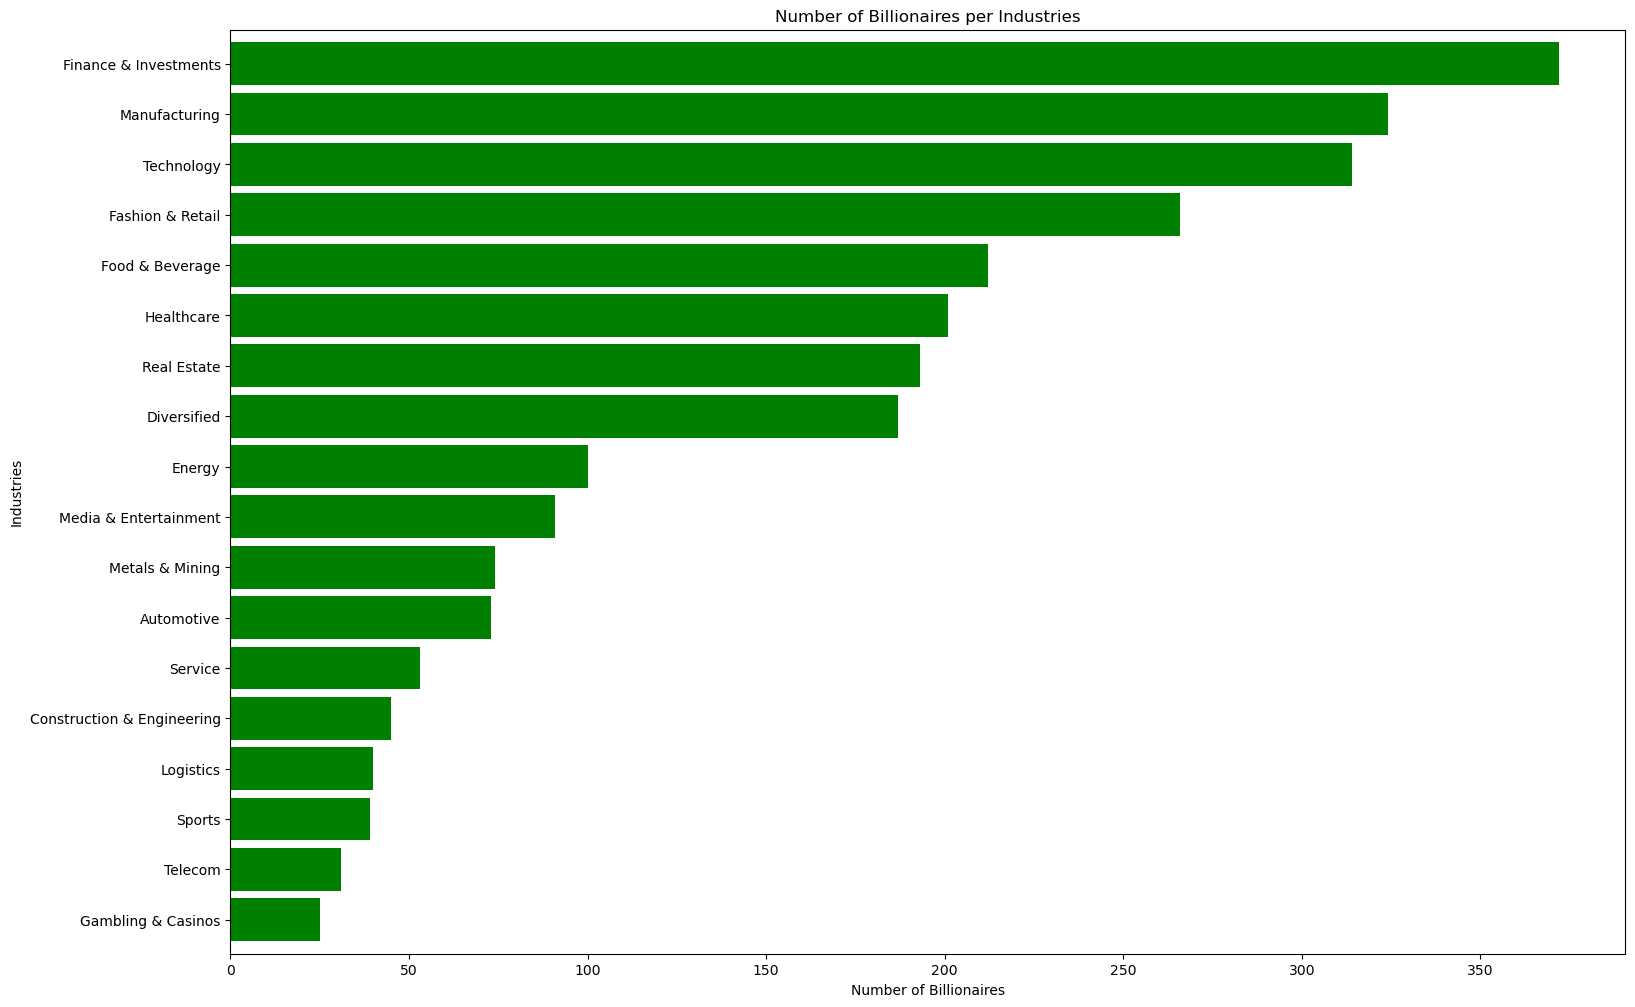

In [5]:
count_industries=data_df.groupby('industries')['finalWorth'].count().sort_values().tail(len(summary__industries))
count_industries.plot(kind='barh', figsize=(18, 12), zorder=2, width=0.85, color='green')
plt.ylabel("Industries")
plt.xlabel("Number of Billionaires")
plt.title("Number of Billionaires per Industries")
plt.savefig("output/Number of Billionaires per Industries.png")


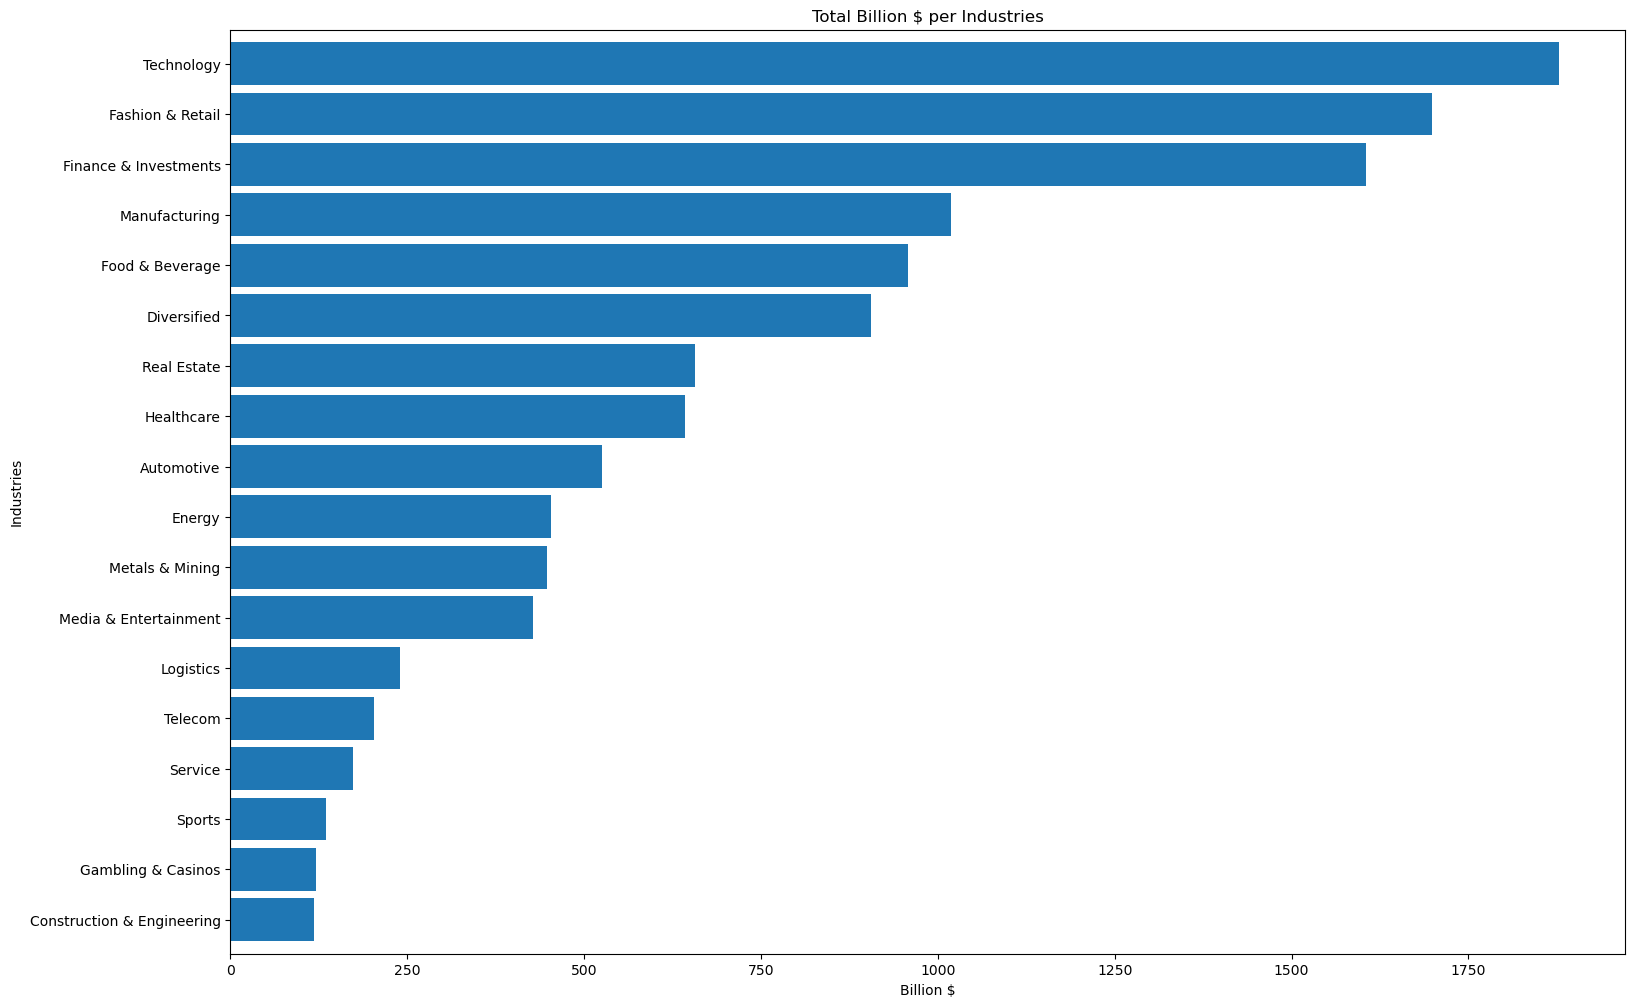

In [6]:

industries_all = data_df.groupby('industries')['finalWorth'].sum().sort_values().tail(len(summary__industries))
industries_all.plot(kind='barh', figsize=(18, 12), zorder=2, width=0.85)
plt.ylabel("Industries")
plt.xlabel("Billion $")
plt.title("Total Billion $ per Industries")
plt.savefig("output/Total Billion per Industries.png")



In [7]:
#Top five industries
top_industries=['Technology','Fashion & Retail','Finance & Investments','Manufacturing']

finalWorth_vol_list=[]

for x in top_industries:

    industries_max_df = data_df.loc[data_df["industries"] == x,'finalWorth']
    finalWorth_vol_list.append(industries_max_df)
    quartiles =round(industries_max_df.quantile([.25,.5,.75]),2)
    lowerq = round(quartiles[0.25],2)
    upperq = round(quartiles[0.75],2)
    iqr = round(upperq-lowerq,2)


    print(f"The lower quartile of "+ x +" final Worth: "+str(lowerq))
    print(f"The upper quartile of "+ x + " final Worth: "+str(upperq))
    print(f"The interquartile range of "+ x + " final Worth: "+ str(iqr))
    print(f"The median of " + x + " final Worth: "+ str(quartiles[0.5]) )
        
        # Determine outliers using upper and lower bounds
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)

    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Technology final Worth: 1.5
The upper quartile of Technology final Worth: 4.5
The interquartile range of Technology final Worth: 3.0
The median of Technology final Worth: 2.2
Values below -3.0 could be outliers.
Values above 9.0 could be outliers.
The lower quartile of Fashion & Retail final Worth: 1.6
The upper quartile of Fashion & Retail final Worth: 4.8
The interquartile range of Fashion & Retail final Worth: 3.2
The median of Fashion & Retail final Worth: 2.5
Values below -3.2 could be outliers.
Values above 9.6 could be outliers.
The lower quartile of Finance & Investments final Worth: 1.5
The upper quartile of Finance & Investments final Worth: 4.62
The interquartile range of Finance & Investments final Worth: 3.12
The median of Finance & Investments final Worth: 2.6
Values below -3.18 could be outliers.
Values above 9.3 could be outliers.
The lower quartile of Manufacturing final Worth: 1.3
The upper quartile of Manufacturing final Worth: 3.32
The interqua

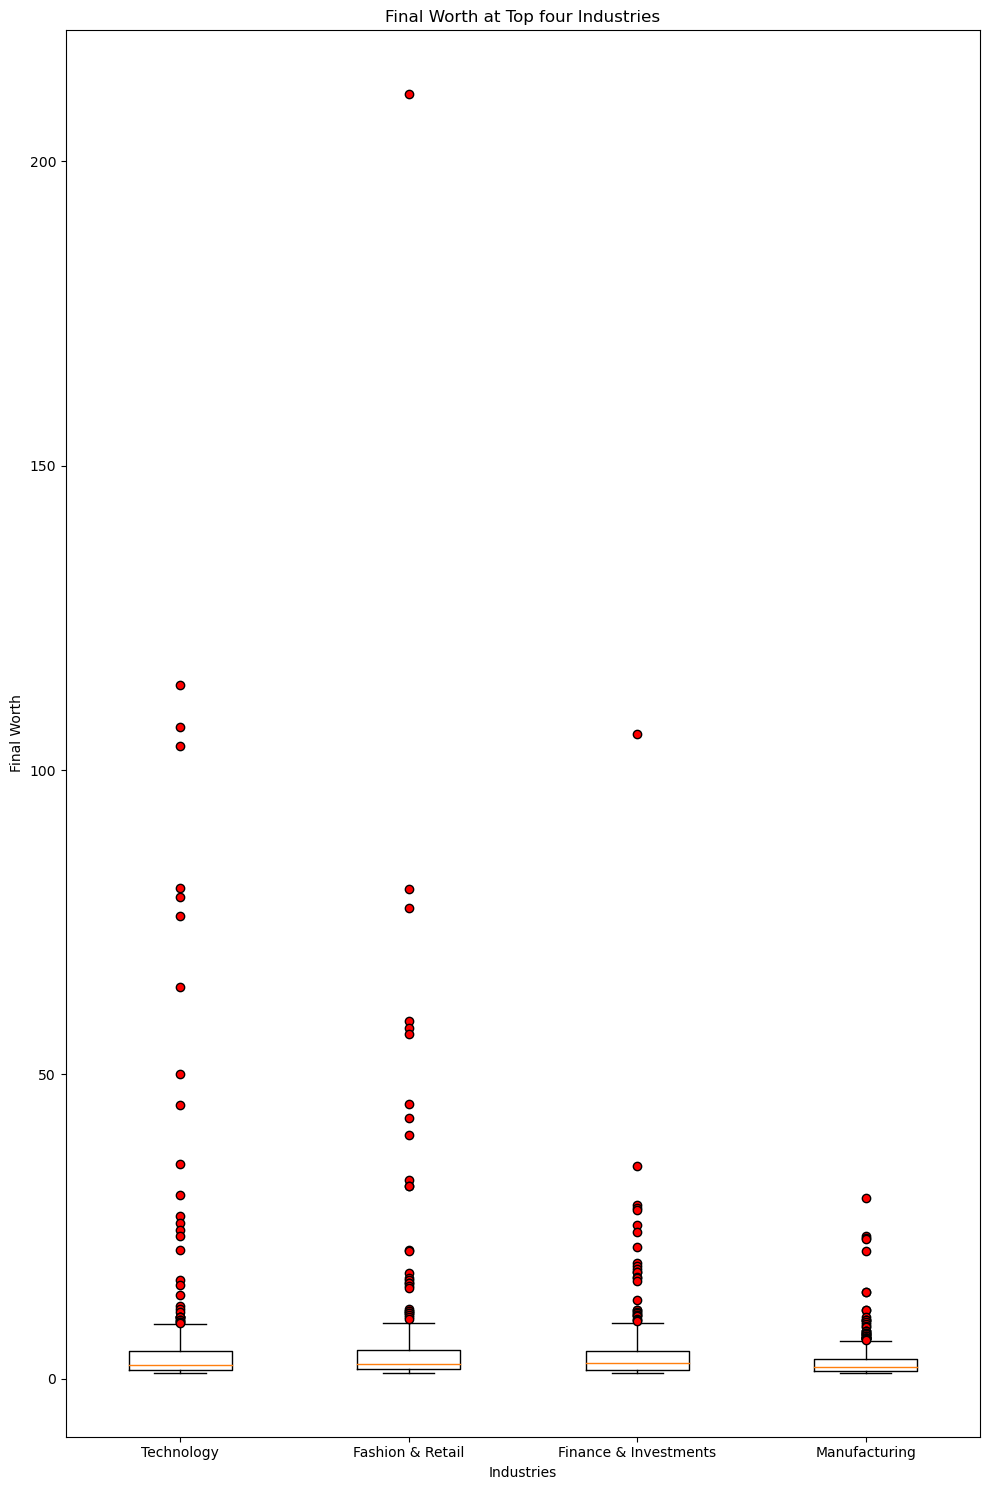

In [29]:

fig1, ax1 = plt.subplots(figsize=(10, 15))
ax1.set_title('Final Worth at Top four Industries')
ax1.set_ylabel('Final Worth')
ax1.set_xlabel('Industries')
flierprops = dict(markerfacecolor='r', markersize=6)
ax1.boxplot(finalWorth_vol_list,labels=top_industries,flierprops=flierprops)



plt.savefig("output/Final Worth at Top four Industries.png")
plt.show()

In [34]:
per_Technology=data_df[(data_df["industries"] == "Technology")]
per_Technology.head(5)

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
2,3,114.0,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,21427.7,88.2,101.8,78.5,9.6,36.6,328239523.0,37.09024,-95.712891
3,4,107.0,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,21427.7,88.2,101.8,78.5,9.6,36.6,328239523.0,37.09024,-95.712891
5,6,104.0,Technology,Bill Gates,67.0,United States,Medina,Microsoft,Technology,United States,...,7.5,21427.7,88.2,101.8,78.5,9.6,36.6,328239523.0,37.09024,-95.712891
9,10,80.7,Technology,Steve Ballmer,67.0,United States,Hunts Point,Microsoft,Technology,United States,...,7.5,21427.7,88.2,101.8,78.5,9.6,36.6,328239523.0,37.09024,-95.712891
11,12,79.2,Technology,Larry Page,50.0,United States,Palo Alto,Google,Technology,United States,...,7.5,21427.7,88.2,101.8,78.5,9.6,36.6,328239523.0,37.09024,-95.712891


In [33]:

per_Fashion_Retail =data_df[(data_df["industries"] == "Fashion & Retail")]
per_Fashion_Retail.head(5)

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211.0,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,2715.518274,65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
10,11,80.5,Fashion & Retail,Francoise Bettencourt Meyers & family,69.0,France,Paris,L'Oréal,Fashion & Retail,France,...,1.1,2715.518274,65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
12,13,77.3,Fashion & Retail,Amancio Ortega,87.0,Spain,La Coruna,Zara,Fashion & Retail,Spain,...,0.7,1394.116311,88.9,102.7,83.3,14.2,47.0,47076781.0,40.463667,-3.749220
18,19,58.8,Fashion & Retail,Jim Walton,74.0,United States,Bentonville,Walmart,Fashion & Retail,United States,...,7.5,21427.700000,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
19,20,57.6,Fashion & Retail,Rob Walton & family,78.0,United States,Bentonville,Walmart,Fashion & Retail,United States,...,7.5,21427.700000,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [32]:
per_Finance_Investments =data_df[(data_df["industries"] == "Finance & Investments")]
per_Finance_Investments.head(5)

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
4,5,106.0,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,21427.7,88.2,101.8,78.5,9.6,36.6,328239523.0,37.09024,-95.712891
35,35,35.0,Finance & Investments,Ken Griffin,54.0,United States,Miami,Hedge funds,Finance & Investments,United States,...,7.5,21427.7,88.2,101.8,78.5,9.6,36.6,328239523.0,37.09024,-95.712891
47,48,28.5,Finance & Investments,Jeff Yass,64.0,United States,Haverford,"Trading, investments",Finance & Investments,United States,...,7.5,21427.7,88.2,101.8,78.5,9.6,36.6,328239523.0,37.09024,-95.712891
48,49,28.1,Finance & Investments,Jim Simons,84.0,United States,East Setauket,Hedge funds,Finance & Investments,United States,...,7.5,21427.7,88.2,101.8,78.5,9.6,36.6,328239523.0,37.09024,-95.712891
49,50,27.8,Finance & Investments,Stephen Schwarzman,76.0,United States,New York,Investments,Finance & Investments,United States,...,7.5,21427.7,88.2,101.8,78.5,9.6,36.6,328239523.0,37.09024,-95.712891


In [31]:
per_Manufacturing =data_df[(data_df["industries"] == "Manufacturing")]
per_Manufacturing.head(5)

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
45,46,29.7,Manufacturing,Reinhold Wuerth & family,87.0,Germany,Kuenzelsau,Fasteners,Manufacturing,Germany,...,1.4,3845.630031,70.2,104.0,80.9,11.5,48.8,8.313280e+07,51.165691,10.451526
63,64,23.4,Manufacturing,He Xiangjian & family,80.0,China,Foshan,Home appliances,Manufacturing,China,...,2.9,19910.000000,50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
65,65,23.1,Manufacturing,Michael Hartono,83.0,Indonesia,Kudus,"Banking, tobacco",Manufacturing,Indonesia,...,3.0,1119.190781,36.3,106.4,71.5,10.2,30.1,2.702039e+08,-0.789275,113.921327
66,67,22.9,Manufacturing,James Ratcliffe,70.0,United Kingdom,London,Chemicals,Manufacturing,United Kingdom,...,1.7,2827.113185,60.0,101.2,81.3,25.5,30.6,6.683440e+07,55.378051,-3.435973
77,77,21.0,Manufacturing,Takemitsu Takizaki,77.0,Japan,Osaka,Sensors,Manufacturing,Japan,...,0.5,5081.769542,63.2,98.8,84.2,11.9,46.7,1.262266e+08,36.204824,138.252924
